In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [55]:
df = pd.read_csv('/content/mnist_train.csv')

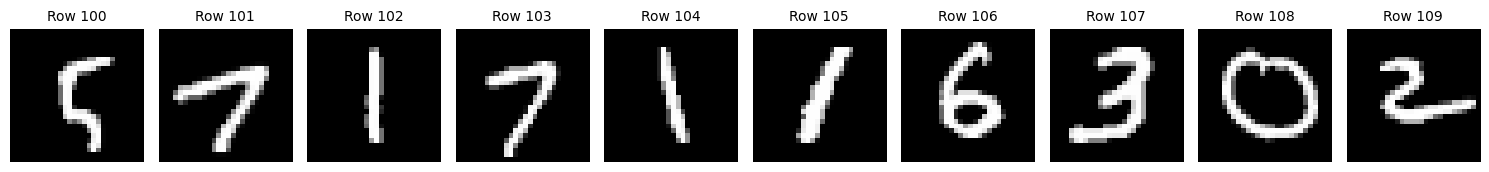

In [56]:
row_num = 100
row_end = row_num + 10
fig, axes = plt.subplots(1, 10, figsize=(15, 15))

for i, rownum in enumerate(range(row_num, row_end)):
    if rownum > -1 and rownum < len(df):
        pixels = df.iloc[rownum][1:].values.reshape(28, 28)
        array = np.array(pixels, dtype=np.uint8)
        img = Image.fromarray(array)
        img.save(f"check_{row_num}.jpg")
        axes[i].imshow(array, cmap='Greys_r')
        axes[i].axis('off')
        axes[i].set_title(f"Row {rownum}", fontsize=10)
    else:
        print(f"Row index {rownum} out of bounds")

plt.tight_layout()
plt.show()

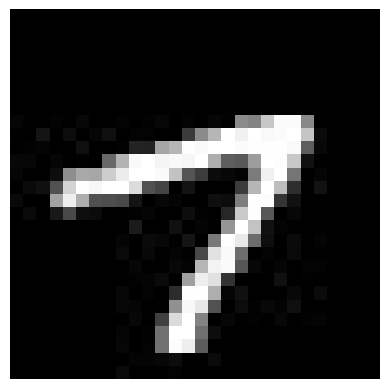

In [59]:
image = Image.open('/content/check_101.jpg').convert('L')
img = np.array(image)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

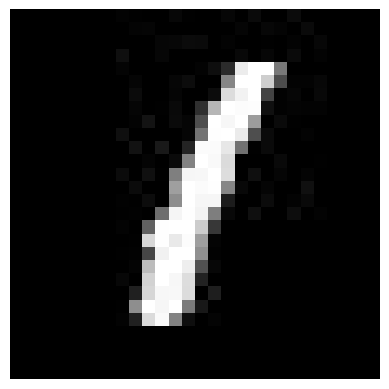

In [60]:
image1 = Image.open('/content/check_105.jpg').convert('L')
img1 = np.array(image1)
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()

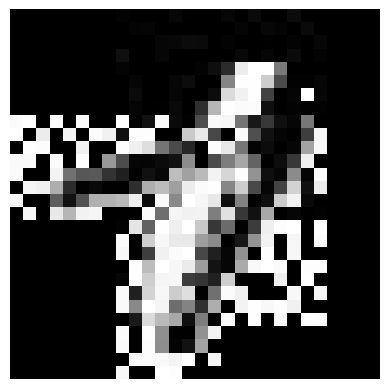

In [62]:
plt.imshow(img1-img, cmap='gray')
plt.axis('off')
plt.show()

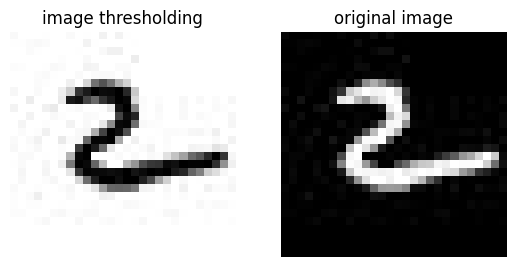

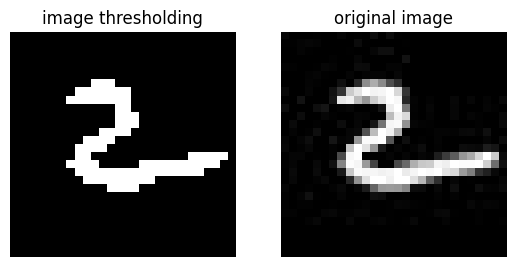

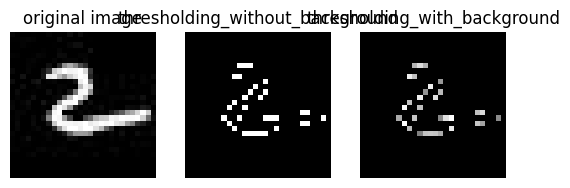

In [46]:
image = Image.open('/content/check_100.jpg').convert('L')
image_array = np.array(image)

def negative_image(img):
  negative=[]
  for i in range(len(img)):
    temporary=[]
    for j in range(len(img[i])):
      temporary.append(255-img[i][j])
    negative.append(temporary)
  return negative

plt.subplot(1,2,1)
neg_img=negative_image(image_array)
plt.imshow(neg_img,cmap='gray')
plt.title('image thresholding')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image_array,cmap='gray')
plt.title('original image')
plt.axis('off')
plt.show()

def thresholding(img, threshold=121):
  new_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] >= threshold:
        new_img[i][j]=255
      else:
        new_img[i][j]=0
  return new_img

plt.subplot(1,2,1)
thresholded_img=thresholding(image_array)
plt.imshow(thresholded_img,cmap='gray')
plt.title('image thresholding')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image_array,cmap='gray')
plt.title('original image')
plt.axis('off')
plt.show()

def thresholding_with_background(img, a=100, b=200):
 negative=[]
 for i in range(len(img)):
  temporary=[]
  for j in range(len(img)):
    if img[i][j] >= a and img[i][j] <= b:
      temporary.append(img[i][j])
    else:
      temporary.append(0)
  negative.append(temporary)
 return np.array(negative)

def thresholding_without_background(img, a=100, b=200):
 negative=[]
 for i in range(len(img)):
  temporary=[]
  for j in range(len(img)):
    if img[i][j] >= a and img[i][j] <= b:
      temporary.append(255)
    else:
      temporary.append(0)
  negative.append(temporary)
 return np.array(negative)

thresholded_img_withbg = thresholding_with_background(image_array)
thresholded_img_withoutbg = thresholding_without_background(image_array)

plt.subplot(1,3,1)
plt.imshow(image_array,cmap='gray')
plt.title('original image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(thresholded_img_withoutbg,cmap='gray')
plt.title('thresholding_without_background')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(thresholded_img_withbg,cmap='gray')
plt.title('thresholding_with_background')
plt.axis('off')
plt.show()

<ipython-input-47-1b7fb78b7a96>:2: RuntimeWarning: divide by zero encountered in log
  log_img = c * np.log(1 + img)
<ipython-input-47-1b7fb78b7a96>:3: RuntimeWarning: invalid value encountered in cast
  return np.array(log_img, dtype=np.uint8)


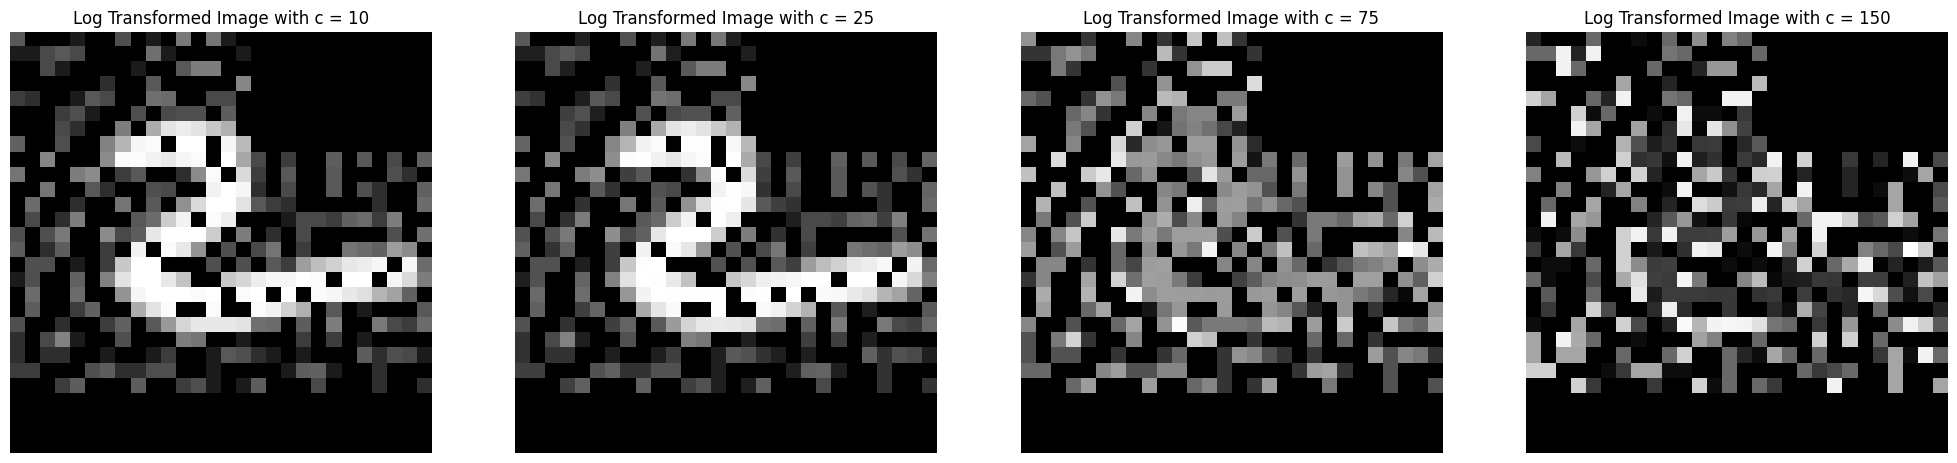

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

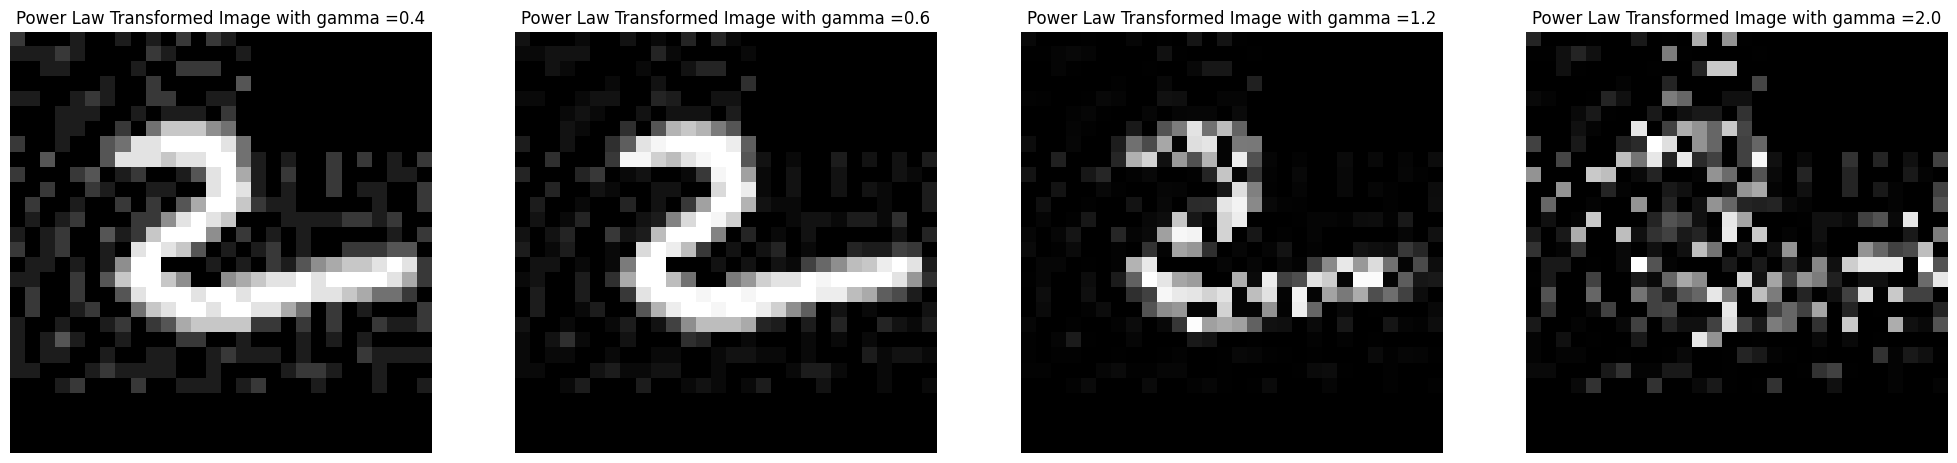

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

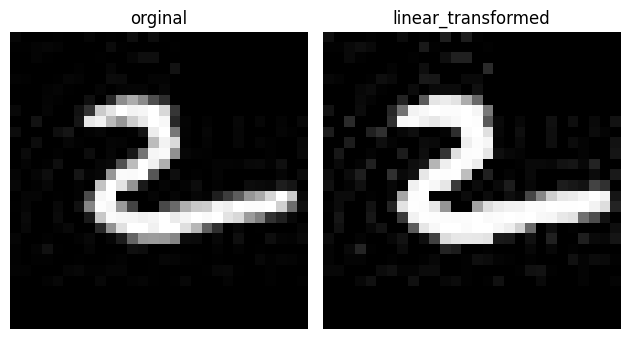

In [47]:
def log_transformation(img,c):
 log_img = c * np.log(1 + img)
 return np.array(log_img, dtype=np.uint8)
c_values = [10, 25, 75, 150]

fig, axes = plt.subplots(1, 4, figsize=(25, 20))
for i in range(len(c_values)):
 log_transformed_img = log_transformation(img, c_values[i])
 plt.figure()
 axes[i].imshow(log_transformed_img, cmap='gray')
 axes[i].set_title(f'Log Transformed Image with c = {c_values[i]}')
 axes[i].axis('off')
plt.show()

def power_law_transformation(img, c, gamma):
 power_img = c * np.power(img, gamma)
 return np.array(power_img, dtype=np.uint8)

gamma_values = [0.4, 0.6, 1.2, 2.0]
fig, axes = plt.subplots(1, 4, figsize=(25, 20))
for i in range(len(gamma_values)):
 power_transformed_img = power_law_transformation(img, 1, gamma_values[i])
 plt.figure()
 axes[i].imshow(power_transformed_img, cmap='gray')
 axes[i].set_title(f'Power Law Transformed Image with gamma ={gamma_values[i]}')
 axes[i].axis('off')
plt.show()

def contrast_stretching(img, r1, s1, r2, s2):
 new_img = img.copy()
 for i in range(new_img.shape[0]):
  for j in range(new_img.shape[1]):
    pixel = img[i, j]
    if pixel < r1:
      new_pixel = (s1 / r1) * pixel
    elif r1 <= pixel <= r2:
      new_pixel = ((s2- s1) / (r2- r1)) * (pixel- r1) + s1
    else:
      new_pixel = ((255- s2) / (255- r2)) * (pixel- r2) + s2
    new_img[i, j] = np.uint8(new_pixel)
 return new_img

r1 = 30
s1 = 70
r2 = 100
s2 = 220
linear_transformed = contrast_stretching(img, r1, s1, r2, s2)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('orginal')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(linear_transformed, cmap='gray')
plt.title('linear_transformed')
plt.axis('off')
plt.tight_layout()
plt.show()

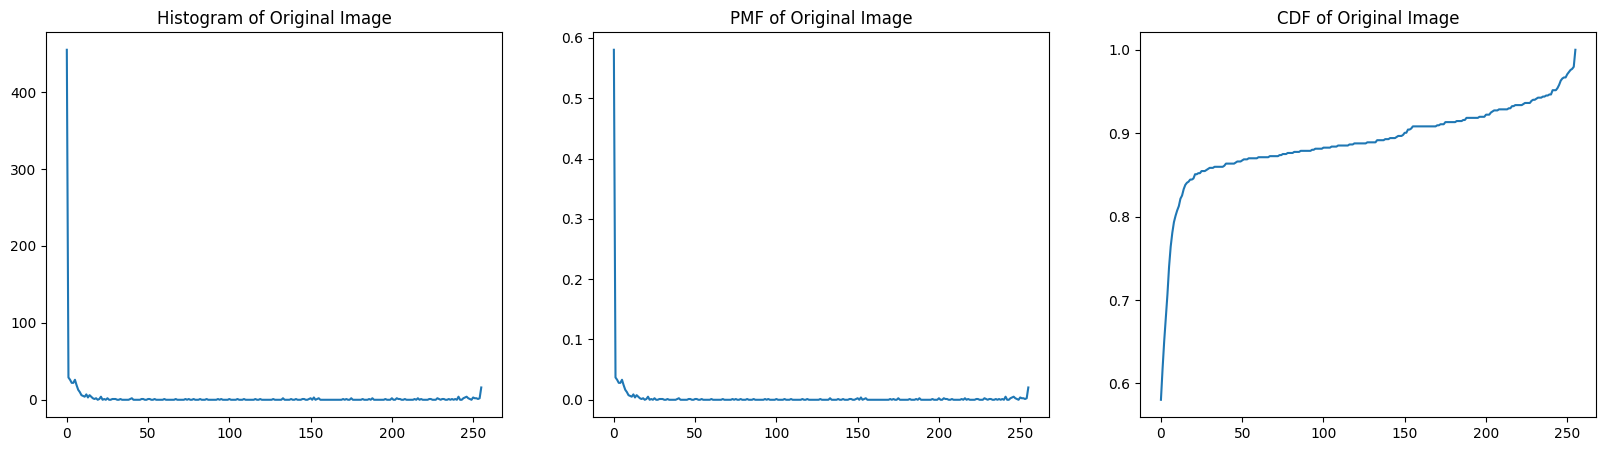

Text(0.5, 1.0, 'High Contrast Image')

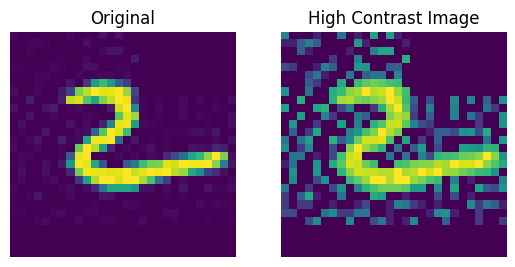

In [48]:
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
plt.plot(hist)
plt.title('Histogram of Original Image')

plt.subplot(1,3,2)
pmf = hist / np.sum(hist)
plt.plot(pmf)
plt.title('PMF of Original Image')

plt.subplot(1,3,3)
cdf = pmf.cumsum()
plt.plot(cdf)
plt.title('CDF of Original Image')

plt.show()

def get_pixel_frequency(image):
 pixel_frequency = np.zeros(256)
 for row in range(image.shape[0]):
  for col in range(image.shape[1]):
    pixel_value =image[row, col].astype(int)
    pixel_frequency[pixel_value] += 1
 return pixel_frequency

L=256
pixel_frequency = get_pixel_frequency(img)
pixel_pdf = pixel_frequency / np.sum(pixel_frequency)
pixel_cumsum = np.cumsum(pixel_pdf)
bits_cumsum = (L-1) * pixel_cumsum
pixel_map = np.round(bits_cumsum).astype(int)

output_image = np.zeros_like(img)
for row in range(output_image.shape[0]):
 for col in range(output_image.shape[1]):
  pixel_val = img[row, col]
  output_image[row, col] = pixel_map[pixel_val]
  output_image = output_image.astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(output_image)
plt.axis('off')
plt.title('High Contrast Image')

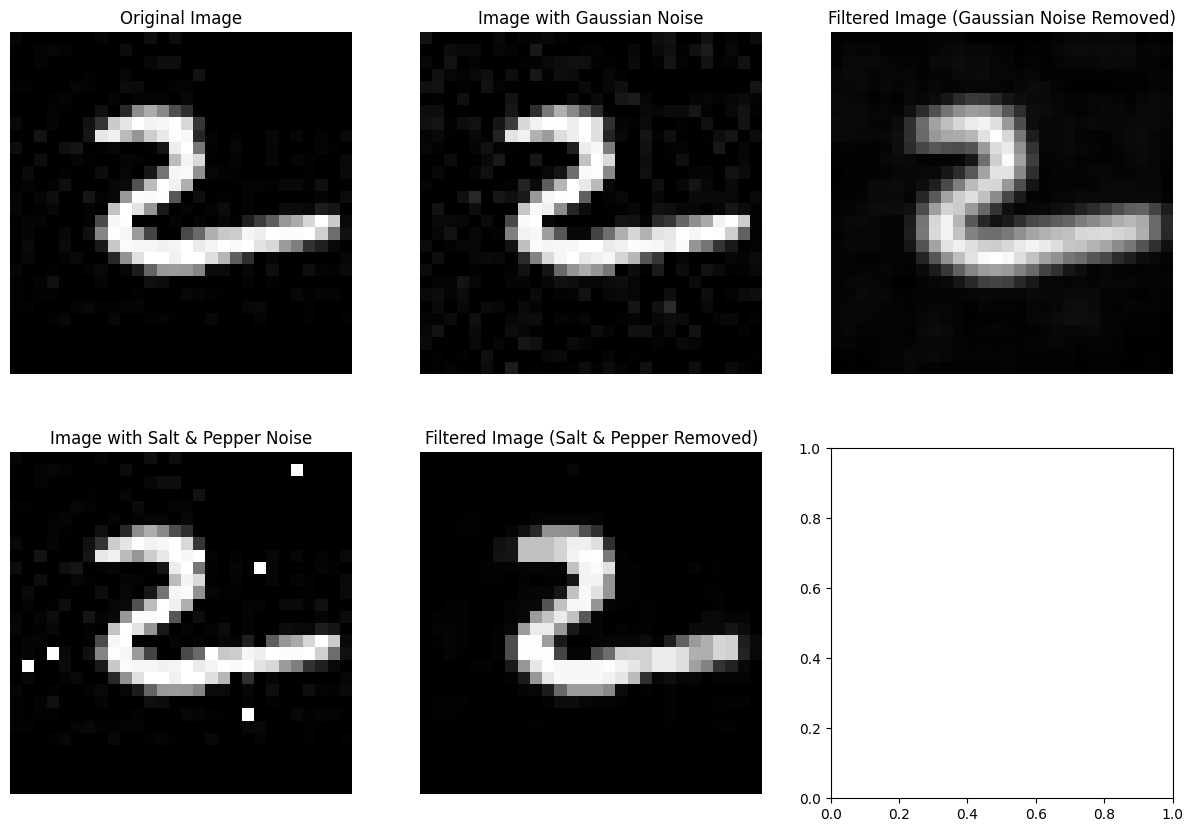

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def add_gaussian_noise(image, mean=0, std=10):
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image

def averaging_filter(image, mask_size=3):
    rows, cols = image.shape
    pad_size = mask_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for i in range(rows):
        for j in range(cols):
            neighborhood = padded_image[i:i+mask_size, j:j+mask_size]
            filtered_image[i, j] = np.mean(neighborhood)

    return filtered_image

def add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy_image = image.copy()
    total_pixels = image.size

    salt = int(salt_prob * total_pixels)
    salt_coords = [np.random.randint(0, i-1, salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    pepper = int(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, i-1, pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

def median_filter(image, mask_size=3):
    rows, cols = image.shape
    pad_size = mask_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for i in range(rows):
        for j in range(cols):
            neighborhood = padded_image[i:i+mask_size, j:j+mask_size].flatten()
            filtered_image[i, j] = np.median(neighborhood)

    return filtered_image

image = Image.open('/content/check_100.jpg').convert('L')
image_array = np.array(image)

noisy_image_gaussian = add_gaussian_noise(image_array, mean=0, std=10)
filtered_image_gaussian = averaging_filter(noisy_image_gaussian, mask_size=3)

noisy_image_salt_pepper = add_salt_and_pepper_noise(image_array, salt_prob=0.01, pepper_prob=0.01)
filtered_image_salt_pepper = median_filter(noisy_image_salt_pepper, mask_size=3)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(image_array, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

axes[0, 1].imshow(noisy_image_gaussian, cmap='gray')
axes[0, 1].set_title("Image with Gaussian Noise")
axes[0, 1].axis('off')

axes[0, 2].imshow(filtered_image_gaussian, cmap='gray')
axes[0, 2].set_title("Filtered Image (Gaussian Noise Removed)")
axes[0, 2].axis('off')

axes[1, 0].imshow(noisy_image_salt_pepper, cmap='gray')
axes[1, 0].set_title("Image with Salt & Pepper Noise")
axes[1, 0].axis('off')

axes[1, 1].imshow(filtered_image_salt_pepper, cmap='gray')
axes[1, 1].set_title("Filtered Image (Salt & Pepper Removed)")
axes[1, 1].axis('off')

plt.show()

Image.fromarray(filtered_image_gaussian.astype(np.uint8)).save("filtered_image_gaussian.jpg")
Image.fromarray(filtered_image_salt_pepper.astype(np.uint8)).save("filtered_image_salt_pepper.jpg")

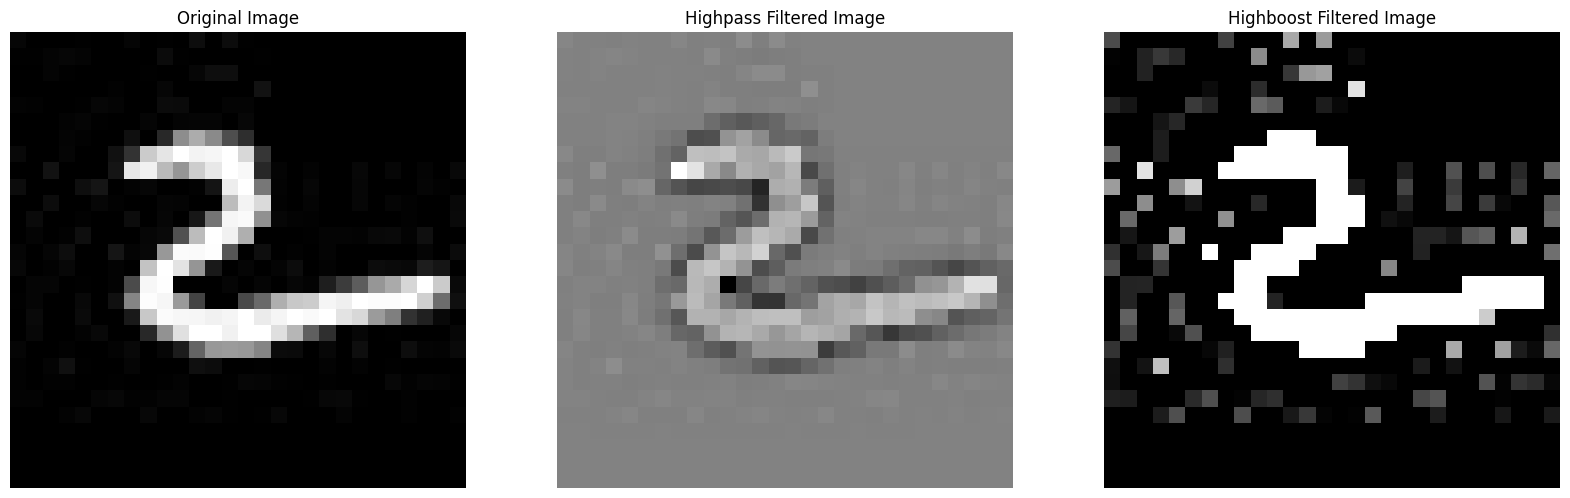

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def add_padding(image, pad_size=1):
    return np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')

def apply_kernel(image, kernel):
    kernel_size = kernel.shape[0]
    image_height, image_width = image.shape
    output = np.zeros((image_height - kernel_size + 1, image_width - kernel_size + 1))

    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            roi = image[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.sum(roi * kernel)

    return output

def highpass(image):
    highpass_kernel = np.array([[-1, -1, -1],
                                [-1,  8, -1],
                                [-1, -1, -1]])
    padded_image = add_padding(image)
    return apply_kernel(padded_image, highpass_kernel)

def highboost(image, boost_factor=1.5):
    highpass_image = highpass(image)
    return np.clip(image + boost_factor * highpass_image, 0, 255)

image = Image.open('/content/check_100.jpg').convert('L')
image_array = np.array(image)

highpass_image = highpass(image_array)
highboost_image = highboost(image_array)

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(image_array, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(highpass_image, cmap='gray')
ax[1].set_title("Highpass Filtered Image")
ax[1].axis('off')

ax[2].imshow(highboost_image, cmap='gray')
ax[2].set_title("Highboost Filtered Image")
ax[2].axis('off')

plt.show()

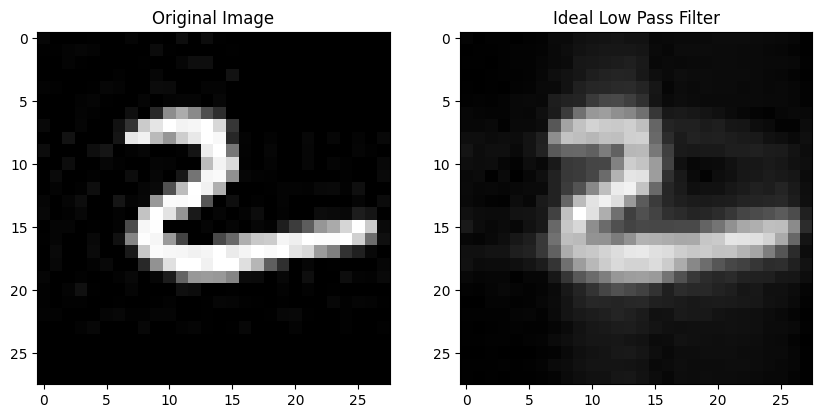

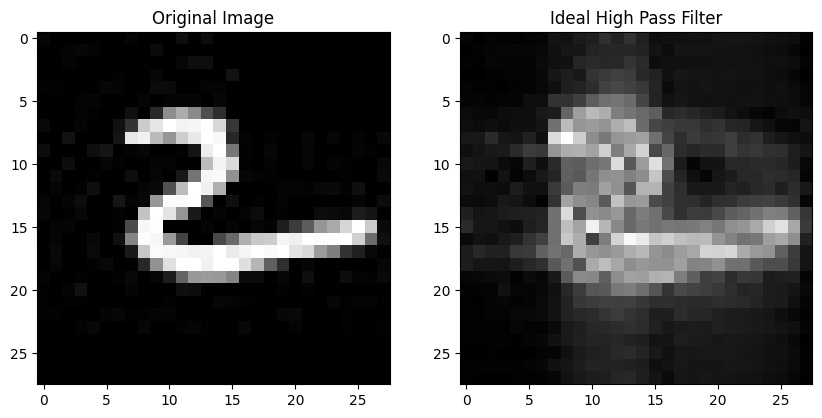

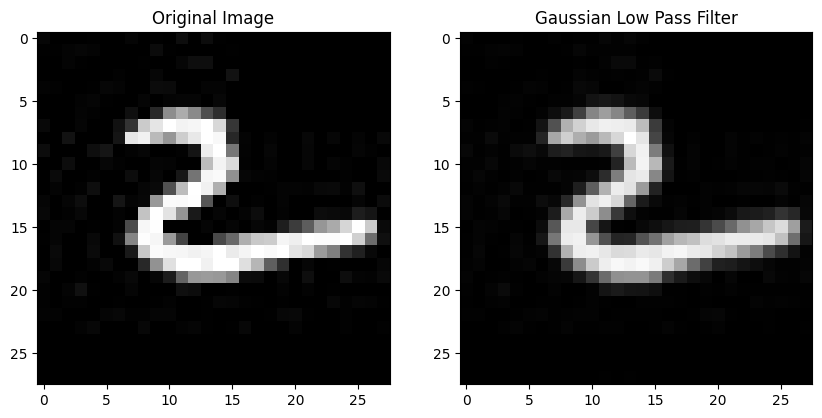

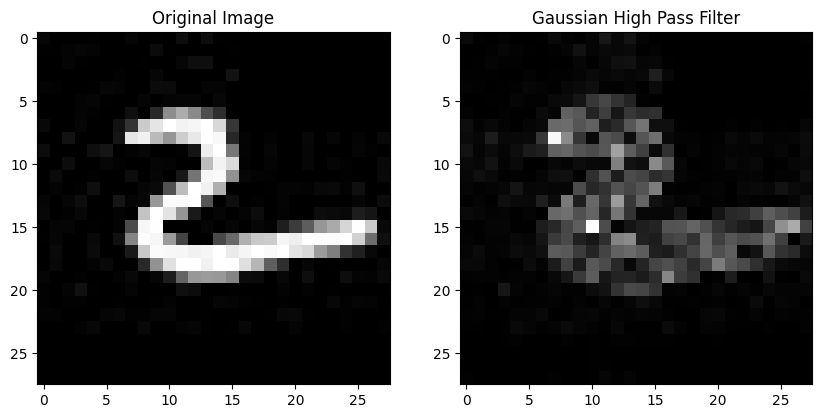

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy.fft import fft2, fftshift, ifft2, ifftshift

def fourier_transform(image):
    f_transform = fft2(image)
    return fftshift(f_transform)

def inverse_fourier_transform(f_transform_shifted):
    f_ishift = ifftshift(f_transform_shifted)
    return np.abs(ifft2(f_ishift))

def create_ideal_low_pass_mask(shape, radius):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1
    return mask

def create_ideal_high_pass_mask(shape, radius):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0
    return mask

def create_gaussian_low_pass_mask(shape, sigma):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    return np.exp(-((x - crow) ** 2 + (y - ccol) ** 2) / (2.0 * sigma**2))

def create_gaussian_high_pass_mask(shape, sigma):
    return 1 - create_gaussian_low_pass_mask(shape, sigma)

def apply_and_visualize(image, mask, title):
    f_transform_shifted = fourier_transform(image)
    filtered = f_transform_shifted * mask
    result_image = inverse_fourier_transform(filtered)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(result_image, cmap='gray')
    plt.title(title)
    plt.show()

# Main Script
image = Image.open('/content/check_100.jpg').convert('L')
image_array = np.array(image)

# Ideal Low Pass Filter
low_pass_mask = create_ideal_low_pass_mask(img.shape, radius=30)
apply_and_visualize(img, low_pass_mask, "Ideal Low Pass Filter")

# Ideal High Pass Filter
high_pass_mask = create_ideal_high_pass_mask(img.shape, radius=30)
apply_and_visualize(img, high_pass_mask, "Ideal High Pass Filter")

# Gaussian Low Pass Filter
gaussian_low_pass_mask = create_gaussian_low_pass_mask(img.shape, sigma=10)
apply_and_visualize(img, gaussian_low_pass_mask, "Gaussian Low Pass Filter")

# Gaussian High Pass Filter
gaussian_high_pass_mask = create_gaussian_high_pass_mask(img.shape, sigma=10)
apply_and_visualize(img, gaussian_high_pass_mask, "Gaussian High Pass Filter")

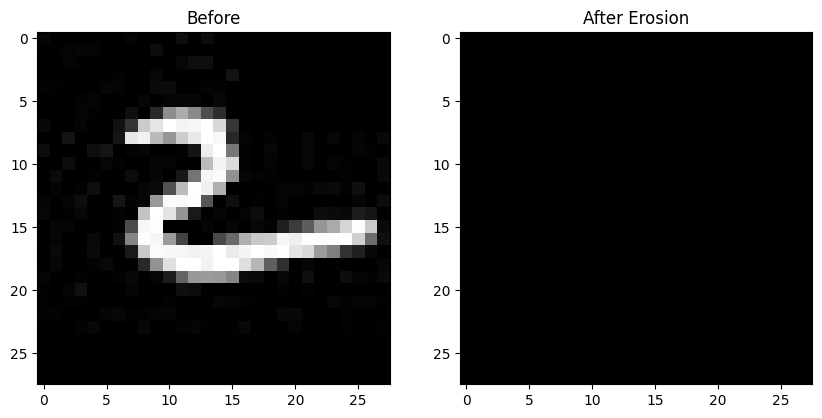

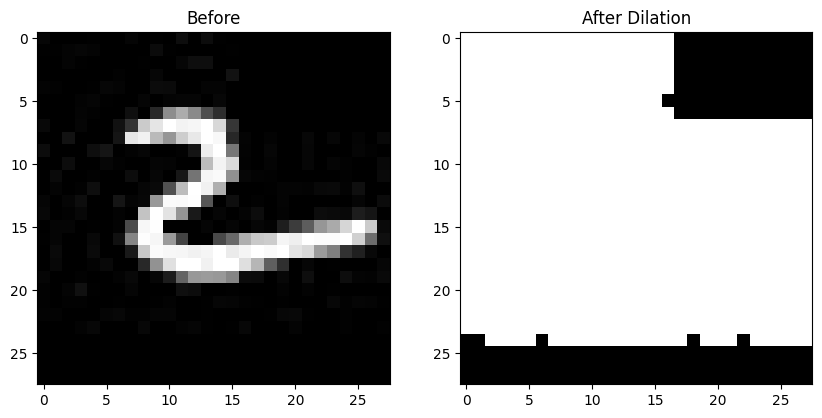

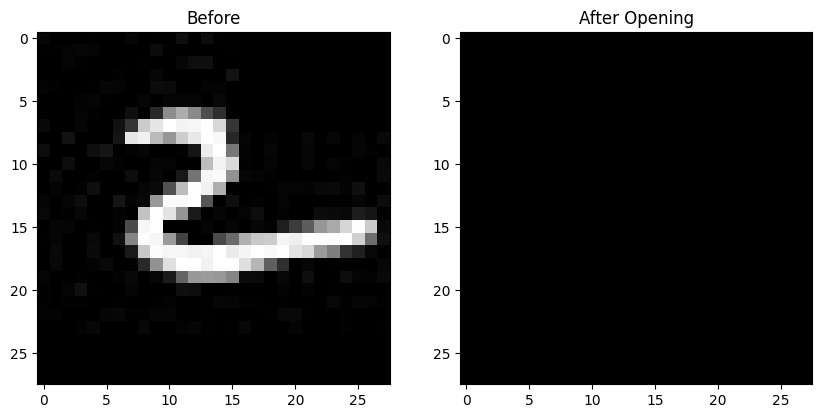

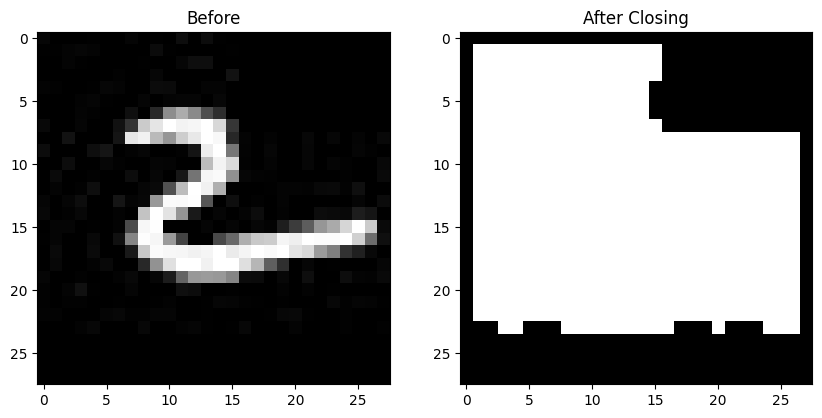

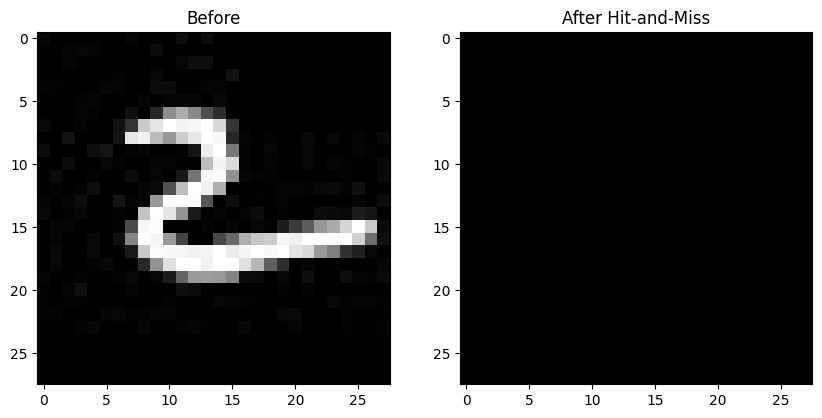

In [63]:
import numpy as np
import matplotlib.pyplot as plt

kernel = np.ones((3, 3), dtype=np.uint8)
negated_kernel = 1 - kernel  # Negation of the kernel

def image_erosion(input_image, kernel):
    img_h, img_w = input_image.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    result_image = np.zeros_like(input_image)
    padded_img = np.pad(input_image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    for row in range(pad_h, img_h + pad_h):
        for col in range(pad_w, img_w + pad_w):
            region = padded_img[row - pad_h:row + pad_h + 1, col - pad_w:col + pad_w + 1]
            if np.min(region * kernel) == 1:
                result_image[row - pad_h, col - pad_w] = 1
    return result_image

# Dilation
def image_dilation(input_image, kernel):
    img_h, img_w = input_image.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    result_image = np.zeros_like(input_image)
    padded_img = np.pad(input_image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    for row in range(pad_h, img_h + pad_h):
        for col in range(pad_w, img_w + pad_w):
            region = padded_img[row - pad_h:row + pad_h + 1, col - pad_w:col + pad_w + 1]
            if np.sum(region * kernel) > 0:
                result_image[row - pad_h, col - pad_w] = 1
    return result_image

# Opening
def image_opening(input_image, kernel):
    eroded = image_erosion(input_image, kernel)
    return image_dilation(eroded, kernel)

# Closing
def image_closing(input_image, kernel):
    dilated = image_dilation(input_image, kernel)
    return image_erosion(dilated, kernel)

# Hit-and-Miss
def hit_and_miss(input_image, kernel):
    eroded = image_erosion(input_image, kernel)
    eroded_neg = image_erosion(1 - input_image, negated_kernel)
    return eroded * eroded_neg

# Visualization Function
def visualize(before, after, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Before")
    plt.imshow(before, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title(f"After {title}")
    plt.imshow(after, cmap='gray')
    plt.show()

# Main Script
image = Image.open('/content/check_100.jpg').convert('L')
binary_image = np.array(image)

# Erosion
eroded_image = image_erosion(binary_image, kernel)
visualize(binary_image, eroded_image, "Erosion")

# Dilation
dilated_image = image_dilation(binary_image, kernel)
visualize(binary_image, dilated_image, "Dilation")

# Opening
opened_image = image_opening(binary_image, kernel)
visualize(binary_image, opened_image, "Opening")

# Closing
closed_image = image_closing(binary_image, kernel)
visualize(binary_image, closed_image, "Closing")

# Hit-and-Miss
hit_and_miss_image = hit_and_miss(binary_image, kernel)
visualize(binary_image, hit_and_miss_image, "Hit-and-Miss")

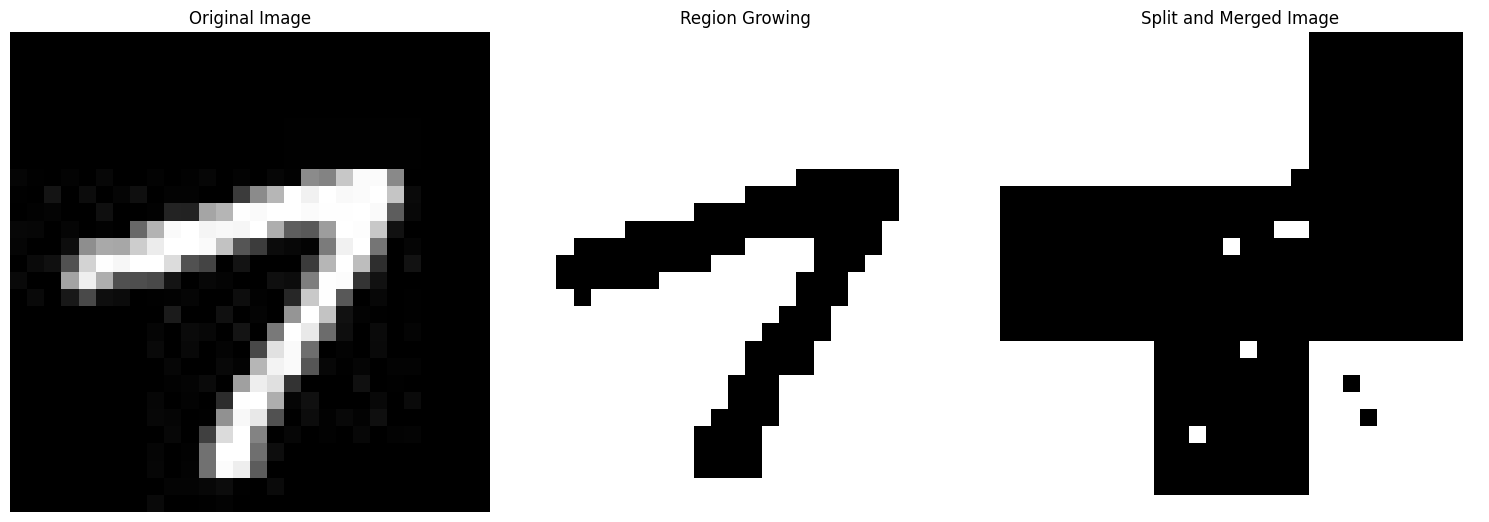

In [69]:
def region_growing(img, seed_point, threshold):
    rows, cols = img.shape
    segmented = np.zeros_like(img)
    region_mean = img[seed_point]
    segmented[seed_point] = 255
    pixels = [seed_point]
    while pixels:
        new_pixels = []
        for x, y in pixels:
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and segmented[nx, ny] == 0:
                    if abs(img[nx, ny] - region_mean) < threshold:
                        segmented[nx, ny] = 255
                        new_pixels.append((nx, ny))
        if new_pixels:
            region_mean = np.mean([img[x, y] for x, y in new_pixels])
            pixels = new_pixels
        else:
            break
    return segmented

def split_and_merge(img, num_regions):
    rows, cols = img.shape
    region_size = rows // num_regions
    segmented = np.zeros_like(img)
    for i in range(0, rows, region_size):
        for j in range(0, cols, region_size):
            sub_region = img[i:i+region_size, j:j+region_size]
            mean_intensity = np.mean(sub_region)
            segmented[i:i+region_size, j:j+region_size] = (abs(sub_region - mean_intensity) < 10) * 255
    return segmented

image = Image.open('/content/check_100.jpg').convert('L')
binary_image = np.array(image)

white_matter_seed = (14, 14)

white_segmented = region_growing(img, white_matter_seed, threshold=60)

split_merged_image = split_and_merge(img, num_regions=3)

# Display results
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_segmented, cmap='gray')
plt.title('Region Growing')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(split_merged_image, cmap='gray')
plt.title('Split and Merged Image')
plt.axis('off')

plt.tight_layout()
plt.show()